In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cobra

plt.style.use(
    "/Volumes/Alexandria/1.Empresa/Data_Analysis/plot_style/prometeus.mplstyle"
)
import seaborn as sns

# 1. Reading the model and basic exploration of the quality of the model

In [2]:
model = cobra.io.read_sbml_model("./carveme_chrys.sbml")
model

Adding exchange reaction EX_14glucan_e with default bounds for boundary metabolite: 14glucan_e.
Adding exchange reaction EX_25dkglcn_e with default bounds for boundary metabolite: 25dkglcn_e.
Adding exchange reaction EX_2m35mdntha_e with default bounds for boundary metabolite: 2m35mdntha_e.
Adding exchange reaction EX_2mbald_e with default bounds for boundary metabolite: 2mbald_e.
Adding exchange reaction EX_35dnta_e with default bounds for boundary metabolite: 35dnta_e.
Adding exchange reaction EX_3mb_e with default bounds for boundary metabolite: 3mb_e.
Adding exchange reaction EX_4abut_e with default bounds for boundary metabolite: 4abut_e.
Adding exchange reaction EX_4hphac_e with default bounds for boundary metabolite: 4hphac_e.
Adding exchange reaction EX_5mdru1p_e with default bounds for boundary metabolite: 5mdru1p_e.
Adding exchange reaction EX_LalaDgluMdap_e with default bounds for boundary metabolite: LalaDgluMdap_e.
Adding exchange reaction EX_Larab_e with default bounds fo

Name,augustus
Memory address,160b01a00
Number of metabolites,746
Number of reactions,1068
Number of genes,523
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, extracellular space, periplasm"


In [3]:
s_matrix = cobra.util.array.create_stoichiometric_matrix(
    model=model, array_type="DataFrame"
)
s_matrix

,EX_14glucan_e,EX_25dkglcn_e,EX_2m35mdntha_e,EX_2mbald_e,EX_35dnta_e,EX_3mb_e,EX_4abut_e,EX_4hphac_e,EX_5mdru1p_e,EX_LalaDgluMdap_e,...,XYLe,XYLt2,YUMPS,ZN2t4,r0817,r0963,r2465_1,sink_aacald_c,Growth,ATPM
10fthf_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000223,0.0
12ppd__R_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12ppd__S_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13dpg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14glucan_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xylb_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
xylb_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
xylu__D_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
zn2_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-0.000341,0.0


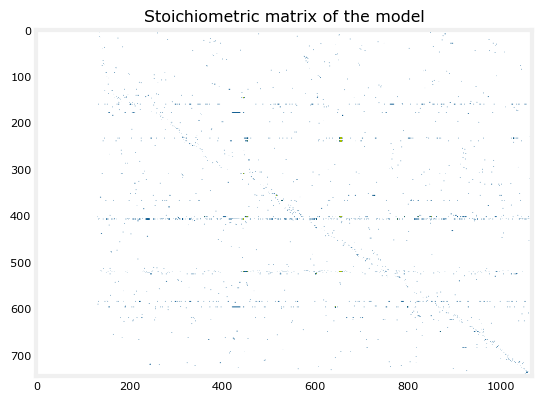

In [23]:
import matplotlib.colors as mcolors

# Load the style
plt.style.use(
    "/Volumes/Alexandria/1.Empresa/Data_Analysis/plot_style/prometeus.mplstyle"
)

# Get the color cycle
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

# Now, colors is a list of colors defined in your style
# You can use these colors to create a colormap for your heatmap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", colors[0], colors[-1]])

# Then, you can use this colormap in your heatmap
plt.imshow(s_matrix, cmap=cmap, vmin=0, vmax=1)
plt.title("Stoichiometric matrix of the model")
plt.show()

In [72]:
most_connectd = s_matrix.sum(axis=1).sort_values(ascending=False).index[:10]
display(s_matrix.loc[most_connectd])

,EX_14glucan_e,EX_25dkglcn_e,EX_2m35mdntha_e,EX_2mbald_e,EX_35dnta_e,EX_3mb_e,EX_4abut_e,EX_4hphac_e,EX_5mdru1p_e,EX_LalaDgluMdap_e,...,XYLe,XYLt2,YUMPS,ZN2t4,r0817,r0963,r2465_1,sink_aacald_c,Growth,ATPM
adp_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.950000,1.0
pi_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.945662,1.0
h_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,53.950000,1.0
nadp_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000447,0.0
co2_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ppi_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773903,0.0
amp_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nh4_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
glc__D_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nadh_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Validando qual a reação de crescimento do modelo 


In [3]:
growth = model.reactions.get_by_id("Growth")
display(growth)
growth.build_reaction_string()

Reaction identifier,Growth
Name,Biomass reaction
Memory address,0x1269a1b80
Stoichiometry,0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001... 0.000223 10-Formyltetrahydrofolate + 0.513689 L-Alanine + 0.000223 S-Adenosyl-L-methionine + 0.295792 L-Arginine + 0.241055 L-Asparagine + 0.241055 L-Aspartate + 54.124831 ATP C10H12N5O13P3 +...
GPR,
Lower bound,0.0
Upper bound,1000.0


'0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 0.0001 mql8_c + 0.001831 nad_c + 0.000447 nadp_c + 0.185265 phe__L_c + 0.221055 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.215792 ser__L_c + 0.004338 so4_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.253687 thr__L_c + 0.056843 trp__L_c + 0.137896 tyr__L_c + 0.1 uaagmda_c + 0.144104 utp_c + 0.423162 val__L_c + 0.000341 zn2_c --> 53.95 adp_c + 53.95 h_c 

### Meio de cultura sendo usado

In [4]:
medium_df = pd.DataFrame.from_dict(model.medium, orient="index", columns=["flux"])
medium_df

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
/Users/gustavotamasco/opt/anaconda3/envs/GSMR/lib/python3.9/site-packages/cobra/medium/boundary_types.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return most[0]


,flux
EX_14glucan_e,1000.0
EX_25dkglcn_e,1000.0
EX_2m35mdntha_e,1000.0
EX_2mbald_e,1000.0
EX_35dnta_e,1000.0
...,...
EX_xyl__D_e,1000.0
EX_xylan4_e,1000.0
EX_xylan8_e,1000.0
EX_xylb_e,1000.0


In [5]:
model.medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
/Users/gustavotamasco/opt/anaconda3/envs/GSMR/lib/python3.9/site-packages/cobra/medium/boundary_types.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return most[0]


{'EX_14glucan_e': 1000.0,
 'EX_25dkglcn_e': 1000.0,
 'EX_2m35mdntha_e': 1000.0,
 'EX_2mbald_e': 1000.0,
 'EX_35dnta_e': 1000.0,
 'EX_3mb_e': 1000.0,
 'EX_4abut_e': 1000.0,
 'EX_4hphac_e': 1000.0,
 'EX_5mdru1p_e': 1000.0,
 'EX_LalaDgluMdap_e': 1000.0,
 'EX_Larab_e': 1000.0,
 'EX_abt_e': 1000.0,
 'EX_ac_e': 1000.0,
 'EX_acald_e': 1000.0,
 'EX_acmum_e': 1000.0,
 'EX_ade_e': 1000.0,
 'EX_ala__L_e': 1000.0,
 'EX_arab__L_e': 1000.0,
 'EX_araban__L_e': 1000.0,
 'EX_arg__L_e': 1000.0,
 'EX_asn__L_e': 1000.0,
 'EX_asp__L_e': 1000.0,
 'EX_biliverd_e': 1000.0,
 'EX_btd_RR_e': 1000.0,
 'EX_btn_e': 1000.0,
 'EX_bz_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_chol_e': 1000.0,
 'EX_cit_e': 1000.0,
 'EX_citr__L_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_co_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_csn_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_cys__L_e': 1000.0,
 'EX_cytd_e': 1000.0,
 'EX_dca_e': 1000.0,
 'EX_ddca_e': 1000.0,
 'EX_dextrin_e': 1000.0,
 'EX_etha_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_

# Reactions

- We control reversibility with the bounds of the reactions

In [6]:
# check all metabolic reactions
set(model.reactions) - set(model.boundary)

{<Reaction 12PPDRDH at 0x124a9f820>,
 <Reaction 14GLUCANabcpp at 0x124a9f880>,
 <Reaction 14GLUCANtexi at 0x124a9fb80>,
 <Reaction 25DKGLCNt2rpp at 0x124a9fc40>,
 <Reaction 25DKGLCNtex at 0x124a9f8b0>,
 <Reaction 2DGLCNRx at 0x124a9f7f0>,
 <Reaction 2DGLCNRy at 0x124a9f910>,
 <Reaction 2DGULRx at 0x124ab1d90>,
 <Reaction 2DGULRy at 0x124ab14c0>,
 <Reaction 2DHPFALDL at 0x124ab1f10>,
 <Reaction 2MBALDt at 0x124ab1dc0>,
 <Reaction 3HBCOAHL at 0x124ab1cd0>,
 <Reaction 3MBt4pp at 0x124ab1a00>,
 <Reaction 3MBtex at 0x124abbf10>,
 <Reaction 3MOPDC at 0x124ab1c10>,
 <Reaction 3PEPTabcpp at 0x124abbd90>,
 <Reaction 3PEPTtex at 0x124abbfd0>,
 <Reaction 3SALATAi at 0x124ab14f0>,
 <Reaction 4ABUTD at 0x124ac1700>,
 <Reaction 4HALDD at 0x124acc520>,
 <Reaction 4HTHRK at 0x124acc250>,
 <Reaction 4HTHRS at 0x124ac16d0>,
 <Reaction 5DKGR at 0x1249d5c40>,
 <Reaction AACOAT at 0x124ac17f0>,
 <Reaction AACPS4 at 0x124ad8700>,
 <Reaction AACPS7 at 0x124acc760>,
 <Reaction AACTOOR at 0x124acc6d0>,
 <React

In [7]:
xyle_rec = model.reactions.get_by_id("XYLe")
xyle_rec

Reaction identifier,XYLe
Name,Xylanase (endo-acting) (extracellular)
Memory address,0x126933850
Stoichiometry,"h2o_e + xylan8_e --> 2.0 xylan4_e H2O H2O + Xylan (8 backbone units, 2 glcur side chain) --> 2.0 Xylan (4 backbone units, 1 glcur side chain)"
GPR,g6123_t1
Lower bound,0.0
Upper bound,1000.0


In [8]:
print(xyle_rec.name)
print(xyle_rec.reaction)

Xylanase (endo-acting) (extracellular)
h2o_e + xylan8_e --> 2.0 xylan4_e


Verifying reactions bounds and reversibility

In [9]:
print(xyle_rec.lower_bound, "< xyle < ", xyle_rec.upper_bound)
print(xyle_rec.reversibility)

0.0 < xyle <  1000.0
False


The lower and upper bound of reactions can also be modified, and the reversibility attribute will automatically be updated. The preferred method for manipulating bounds is using reaction.bounds, e.g.

In [10]:
old_bounds = xyle_rec.bounds
xyle_rec.bounds = (-10, 850)
print(xyle_rec.lower_bound, "< xyle < ", xyle_rec.upper_bound)
print("Reversibility after modification: ", xyle_rec.reversibility)
xyle_rec.bounds = old_bounds
print("Reversibility after the reseting: ", xyle_rec.reversibility)

-10 < xyle <  850
Reversibility after modification:  True
Reversibility after the reseting:  False


We can also check for **mass balance**: if comes empty, the reaction is balanced.


In [11]:
display(xyle_rec.check_mass_balance())

{}

In [12]:
# In order to add a metabolite, we pass in a dict with the metabolite object and its coefficient.
xyle_rec.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
display(xyle_rec.reaction)
display(xyle_rec.check_mass_balance())
# We can also remove when its no longer mass balanced
xyle_rec.subtract_metabolites({model.metabolites.get_by_id("h_c"): -1})
display(xyle_rec.reaction)
display(xyle_rec.check_mass_balance())

'h2o_e + h_c + xylan8_e --> 2.0 xylan4_e'

{'charge': -1.0, 'H': -1.0}

'h2o_e + xylan8_e --> 2.0 xylan4_e'

{}

It is also possible to build the reaction from a string. However, care must be taken when doing this to ensure reaction id’s match those in the model. The direction of the arrow is also used to update the upper and lower bounds.

In [13]:
help(model.add_reactions)

Help on method add_reactions in module cobra.core.model:

add_reactions(reaction_list: Iterable[cobra.core.reaction.Reaction]) -> None method of cobra.core.model.Model instance
    Add reactions to the model.
    
    Reactions with identifiers identical to a reaction already in the
    model are ignored.
    
    The change is reverted upon exit when using the model as a context.
    
    Parameters
    ----------
    reaction_list : list
        A list of `cobra.Reaction` objects



In [14]:
from cobra import Model, Reaction, Metabolite


# Create a new reaction
reaction = Reaction("xylose_import")

# Create metabolites
g6p_c = Metabolite("g6p_c")
f6p_c = Metabolite("f6p_c")
h_c = Metabolite("h_c")
green_eggs = Metabolite("green_eggs")
ham = Metabolite("ham")

# Add metabolites to the reaction. The numbers indicate their stoichiometry.
reaction.add_metabolites({g6p_c: -1.0, f6p_c: 1.0, h_c: 1.0, green_eggs: 1.0, ham: 1.0})

# Add the reaction to the model
model.add_reactions([reaction])

In [15]:
model.reactions.get_by_id("xylose_import")

Reaction identifier,xylose_import
Name,
Memory address,0x126b297f0
Stoichiometry,g6p_c --> f6p_c + green_eggs + h_c + ham D-Glucose 6-phosphate --> D-Fructose 6-phosphate + + H+ +
GPR,
Lower bound,0.0
Upper bound,1000.0


Checking the mass balance of the reactions in model

In [16]:
for ids, reac in enumerate(model.reactions):
    mass_balance = reac.check_mass_balance()
    if mass_balance:
        print(ids, reac.id, mass_balance)

0 EX_14glucan_e {'C': -36, 'H': -62, 'O': -31}
1 EX_25dkglcn_e {'charge': 1, 'C': -6, 'H': -7, 'O': -7}
2 EX_2m35mdntha_e {'H': -1, 'N': -1}
3 EX_2mbald_e {'C': -5, 'H': -10, 'O': -1}
4 EX_35dnta_e {'H': -1, 'N': -1}
5 EX_3mb_e {'charge': 1, 'C': -5, 'H': -9, 'O': -2}
6 EX_4abut_e {'C': -4, 'H': -9, 'N': -1, 'O': -2}
7 EX_4hphac_e {'charge': 1, 'C': -8, 'H': -7, 'O': -3}
8 EX_5mdru1p_e {'charge': 2, 'C': -6, 'H': -11, 'O': -7, 'P': -1, 'S': -1}
9 EX_LalaDgluMdap_e {'charge': 1, 'C': -15, 'H': -25, 'N': -4, 'O': -8}
10 EX_Larab_e {'C': -15, 'H': -24, 'O': -12}
11 EX_abt_e {'C': -5, 'H': -12, 'O': -5}
12 EX_ac_e {'charge': 1, 'C': -2, 'H': -3, 'O': -2}
13 EX_acald_e {'C': -2, 'H': -4, 'O': -1}
14 EX_acmum_e {'charge': 1, 'C': -11, 'H': -18, 'N': -1, 'O': -8}
15 EX_ade_e {'C': -5, 'H': -5, 'N': -5}
16 EX_ala__L_e {'C': -3, 'H': -7, 'N': -1, 'O': -2}
17 EX_arab__L_e {'C': -5, 'H': -10, 'O': -5}
18 EX_araban__L_e {'C': -15, 'H': -26, 'O': -13}
19 EX_arg__L_e {'charge': -1, 'C': -6, 'H': -15

# Metabolites

In [17]:
atp = model.metabolites.get_by_id("atp_c")
display(atp)
display(atp.summary())

Metabolite identifier,atp_c
Name,ATP C10H12N5O13P3
Memory address,0x124318dc0
Formula,C10H12N5O13P3
Compartment,C_c
In 152 reaction(s),"PPNCL3, UM3PL, MCCC, IVCS, 4HTHRK, PFK, ACITL, DADK, FACOAL161, ACKr, ADNK1, PC, XYLBabc, PPAKr, ACCOAC, NTP1, OPAH, FACOAL161t2pp, NDPK2, NDPK1, NMNAT, TMPK, AACPS4, AACPS7, SADT, MALTHXabcpp,..."


Percent,Flux,Reaction,Definition
50.12%,1000,PGK,3pg_c + atp_c <=> 13dpg_c + adp_c
49.86%,994.8,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
0.02%,0.4505,URIDK2r,atp_c + dump_c <=> adp_c + dudp_c
Percent,Flux,Reaction,Definition
0.09%,-1.722,3PEPTabcpp,LalaDgluMdap_p + atp_c + h2o_c --> LalaDgluMdap_c + adp_c + h_c + pi_c
0.34%,-6.872,ADK1,amp_c + atp_c <=> 2.0 adp_c
0.15%,-3.069,ADNK1,adn_c + atp_c --> adp_c + amp_c + h_c
0.09%,-1.722,ALAALAr,2.0 ala__D_c + atp_c <=> adp_c + alaala_c + h_c + pi_c
0.00%,-0.08962,CA2abc,atp_c + ca2_e + h2o_c --> adp_c + ca2_c + h_c + pi_c
0.14%,-2.764,CTPS1,atp_c + nh4_c + utp_c --> adp_c + ctp_c + 2.0 h_c + pi_c


We can also check if its a charged molecule or not

In [18]:
atp.charge

-4

We can also evaluate the reactions that atp takes place

In [19]:
print(len(atp.reactions))
atp.reactions

152


frozenset({<Reaction 14GLUCANabcpp at 0x124a9f880>,
           <Reaction 3PEPTabcpp at 0x124abbd90>,
           <Reaction 4HTHRK at 0x124acc250>,
           <Reaction AACOAT at 0x124ac17f0>,
           <Reaction AACPS4 at 0x124ad8700>,
           <Reaction AACPS7 at 0x124acc760>,
           <Reaction ACCOAC at 0x124990550>,
           <Reaction ACITL at 0x1249b02e0>,
           <Reaction ACKr at 0x1060f63a0>,
           <Reaction ACS2 at 0x1249a9340>,
           <Reaction ACS at 0x124abba60>,
           <Reaction ADK1 at 0x124aed5e0>,
           <Reaction ADNCYC at 0x124b44f10>,
           <Reaction ADNK1 at 0x124b44490>,
           <Reaction ADSK at 0x124b50d90>,
           <Reaction ALAALAr at 0x124b71f70>,
           <Reaction ARGSS at 0x12610ad30>,
           <Reaction ASNS1 at 0x1261138e0>,
           <Reaction ASPK at 0x12611cfd0>,
           <Reaction ATPM at 0x1269a1c40>,
           <Reaction ATPPRT at 0x126134f70>,
           <Reaction CA2abc1 at 0x12615d070>,
           <Reac

# Genes 

The gene_reaction_rule is a boolean representation of the gene requirements for this reaction to be active as described in Schellenberger et al 2011 Nature Protocols 6(9):1290-307.

The GPR is stored as the GPR class in the gpr for a Reaction. A string representation of it is stored as the gene_reaction_rule for a Reaction object.

In [20]:
xyle_rec.gene_reaction_rule

'g6123_t1'

In [21]:
xyle_rec.genes

frozenset({<Gene g6123_t1 at 0x124a9f670>})

In [22]:
xyle_gene = model.genes.get_by_id("g6123_t1")
xyle_gene

Gene identifier,g6123_t1
Name,G_g6123_t1
Memory address,0x124a9f670
Functional,True
In 1 reaction(s),XYLe


In [23]:
# each gene keeps track of the reactions it is associated with
xyle_gene.reactions

frozenset({<Reaction XYLe at 0x126933850>})

### using model as context for manipulations

Quite often, one wants to make small changes to a model and evaluate the impacts of these. For example, we may want to knock-out all reactions sequentially, and see what the impact of this is on the objective function. One way of doing this would be to create a new copy of the model before each knock-out with model.copy(). However, even with small models, this is a very slow approach as models are quite complex objects. Better then would be to do the knock-out, optimizing and then manually resetting the reaction bounds before proceeding with the next reaction. Since this is such a common scenario however, cobrapy allows us to use the model as a context, to have changes reverted automatically.

In [24]:
from cobra.io import load_model

If changes in solver are needed:

```python

import cobra.util
from cobra import Configuration

config = Configuration()

print(cobra.util.solver.get_solver_name())
# Set the solver to glpk
config.solver = "glpk"
```

In [25]:
from optlang.exceptions import SolverError

new_model = load_model("textbook")
new_model

Name,e_coli_core
Memory address,126bb7b80
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


This effects are only happening in the context of the model, and the solver will be reset to the default solver after the context is exited.

In [26]:
for reaction in new_model.reactions[:5]:
    with new_model as new_model:
        reaction.knock_out()
        try:
            new_model.optimize()
            print(
                "%s blocked (bounds: %s), new growth rate %f"
                % (reaction.id, str(reaction.bounds), new_model.objective.value)
            )
        except SolverError:
            print(f"No solution exists after knocking out {reaction.id}")

ACALD blocked (bounds: (0, 0)), new growth rate 0.873922
ACALDt blocked (bounds: (0, 0)), new growth rate 0.873922
ACKr blocked (bounds: (0, 0)), new growth rate 0.873922
ACONTa blocked (bounds: (0, 0)), new growth rate -0.000000
ACONTb blocked (bounds: (0, 0)), new growth rate -0.000000


We can also use more complex nested contexts, for example to change the solver and the tolerance level:


In [27]:
print("original objective: ", new_model.objective.expression)
with new_model:
    new_model.objective = "ATPM"
    print("print objective in first context:", new_model.objective.expression)
    with new_model:
        new_model.objective = "ACALD"
        print("print objective in second context:", new_model.objective.expression)
    print("objective after exiting second context:", new_model.objective.expression)
print("back to original objective:", new_model.objective.expression)

original objective:  1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
print objective in first context: 1.0*ATPM - 1.0*ATPM_reverse_5b752
print objective in second context: 1.0*ACALD - 1.0*ACALD_reverse_fda2b
objective after exiting second context: 1.0*ATPM - 1.0*ATPM_reverse_5b752
back to original objective: 1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba


# 2 Global Configuration 

In [28]:
cobra_config = cobra.Configuration()

# 3 Building a Model

In [29]:
from cobra import Model, Reaction, Metabolite

In [30]:
model = Model("example_model")

# Reaction

reaction = Reaction(
    "R_3OAS140"
)  # we add the R_ prefix to specify that this is a reaction
reaction.name = "3 oxoacyl acyl carrier protein synthase n C140"
reaction.subsystem = "Cell Envelope Biosynthesis"
reaction.lower_bound = 0.0  # This is the default
reaction.upper_bound = 1000.0  # This is the default

We need to create metabolites as well. If we were using an existing model, we could use Model.get_by_id to get the appropriate Metabolite objects instead.

In [31]:
ACP_c = Metabolite(
    "ACP_c", formula="C11H21N2O7PRS", name="acyl-carrier-protein", compartment="c"
)
omrsACP_c = Metabolite(
    "M3omrsACP_c",
    formula="C25H45N2O9PRS",
    name="3-Oxotetradecanoyl-acyl-carrier-protein",
    compartment="c",
)
co2_c = Metabolite("co2_c", formula="CO2", name="CO2", compartment="c")
malACP_c = Metabolite(
    "malACP_c",
    formula="C14H22N2O10PRS",
    name="Malonyl-acyl-carrier-protein",
    compartment="c",
)
h_c = Metabolite("h_c", formula="H", name="H", compartment="c")
ddcaACP_c = Metabolite(
    "ddcaACP_c",
    formula="C23H43N2O8PRS",
    name="Dodecanoyl-ACP-n-C120ACP",
    compartment="c",
)

### Important information 

It is highly recommended that the ids for reactions, metabolites and genes are valid **SBML identifiers (SId)**. SId is a data type derived from the basic XML typestring, but with restrictions about the characters permitted and the sequences in which those characters may appear.

```
letter   ::=   ’a’..’z’,’A’..’Z’
digit    ::=   ’0’..’9’
idChar   ::=   letter | digit | ’_’
SId      ::=   ( letter | ’_’ ) idChar*
```
The main limitation is that ids cannot start with numbers. Using SIds allows serialization to SBML. In addition features such as code completion and object access via the dot syntax will work in cobrapy.


Adding metabolites we just created to the reactions

In [32]:
reaction.add_metabolites(
    {
        malACP_c: -1.0,
        h_c: -1.0,
        ddcaACP_c: -1.0,
        co2_c: 1.0,
        ACP_c: 1.0,
        omrsACP_c: 1.0,
    }
)
reaction.reaction  # This gives a string representation of the reaction

'ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c'

The *gene_reaction_rule is a boolean representation of the gene requirements for this reaction to be active* as described in Schellenberger et al 2011 Nature Protocols 6(9):1290-307. We will assign the gene reaction rule string, which will automatically create the corresponding gene objects.

In [33]:
reaction.gene_reaction_rule = (
    "( STM2378 or STM1197 )"  # creating the association of required genes
)
reaction.genes  # this shows the genes associated with the reaction

frozenset({<Gene STM1197 at 0x126f1a9d0>, <Gene STM2378 at 0x126f1adc0>})

Now we can add the new reactions to the model

In [34]:
model.add_reactions([reaction])
# The model should now contain the reaction
print(f"{len(model.reactions)} reactions")
print(f"{len(model.metabolites)} metabolites")
print(f"{len(model.genes)} genes")

1 reactions
6 metabolites
2 genes


In [35]:
def print_model_info(model):
    # Iterate through the the objects in the model
    print("Reactions")
    print("---------")
    for x in model.reactions:
        print("%s : %s" % (x.id, x.reaction))

    print("\nMetabolites")
    print("-----------")
    for x in model.metabolites:
        print("%9s : %s" % (x.id, x.formula))

    print("\nGenes")
    print("-----")
    for x in model.genes:
        associated_ids = (i.id for i in x.reactions)
        print(
            "%s is associated with reactions: %s"
            % (x.id, "{" + ", ".join(associated_ids) + "}")
        )


print_model_info(model)

Reactions
---------
R_3OAS140 : ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c

Metabolites
-----------
 malACP_c : C14H22N2O10PRS
      h_c : H
ddcaACP_c : C23H43N2O8PRS
    co2_c : CO2
    ACP_c : C11H21N2O7PRS
M3omrsACP_c : C25H45N2O9PRS

Genes
-----
STM2378 is associated with reactions: {R_3OAS140}
STM1197 is associated with reactions: {R_3OAS140}


### Objective Function 

Last we need to set the objective of the model. Here, we just want this to be the maximization of the flux in the single reaction we added and we do this by assigning the reaction’s identifier to the objective property of the model.

In [36]:
model.objective = "R_3OAS140"

In [37]:
print(model.objective.expression)
print(model.objective.direction)

1.0*R_3OAS140 - 1.0*R_3OAS140_reverse_60acb
max


validation the model

In [38]:
import tempfile
from pprint import pprint
from cobra.io import write_sbml_model, validate_sbml_model

with tempfile.NamedTemporaryFile(suffix=".xml") as f_sbml:
    write_sbml_model(model, filename=f_sbml.name)
    report = validate_sbml_model(filename=f_sbml.name)

In [39]:
report

(<Model example_model at 0x126f16850>,
 {'SBML_FATAL': [],
  'SBML_ERROR': [],
  'SBML_SCHEMA_ERROR': [],
  'SBML_WARNING': [],
  'COBRA_FATAL': [],
  'COBRA_ERROR': [],
  'COBRA_WARNING': [],
  'COBRA_CHECK': []})

### Exchanges, Sinks and Demands
Boundary reactions can be added using the model’s method add_boundary. There are three different types of pre-defined boundary reactions: exchange, demand, and sink reactions. All of them are unbalanced pseudo reactions, that means they fulfill a function for modeling by adding to or removing metabolites from the model system but are not based on real biology. An exchange reaction is a reversible reaction that adds to or removes an extracellular metabolite from the extracellular compartment. A demand reaction is an irreversible reaction that consumes an intracellular metabolite. A sink is similar to an exchange but specifically for intracellular metabolites, i.e., a reversible reaction that adds or removes an intracellular metabolite.

In [40]:
print("exchanges", model.exchanges)
print("demands", model.demands)
print("sinks", model.sinks)

There are no boundary reactions in this model. Therefore, specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.
There are no boundary reactions in this model. Therefore, specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.
There are no boundary reactions in this model. Therefore, specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.


exchanges []
demands []
sinks []


**Boundary reactions are defined on metabolites**. First we add two metabolites to the model then we define the boundary reactions. We add glycogen to the cytosolic compartment c and CO2 to the external compartment e.

In [41]:
model.add_metabolites(
    [
        Metabolite(
            "glycogen_c",
            name="Glycogen",
            compartment="c",
            formula="C6H10O5",
        ),
        Metabolite(
            "co2_e",
            name="CO2",
            compartment="e",
            formula="CO2",
        ),
    ]
)

In [42]:
# create the exchange reaction

model.add_boundary(
    model.metabolites.get_by_id("co2_e"), type="exchange", reaction_id="EX_co2_e"
)

Reaction identifier,EX_co2_e
Name,CO2 exchange
Memory address,0x126f1a4c0
Stoichiometry,co2_e <=> CO2 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [43]:
# create a sink reaction

model.add_boundary(
    model.metabolites.get_by_id("glycogen_c"), type="synk", reaction_id="SK_glycogen_c"
)

Reaction identifier,SK_glycogen_c
Name,Glycogen synk
Memory address,0x126f165e0
Stoichiometry,glycogen_c <=> Glycogen <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [44]:
# Now we have an additional exchange and sink reaction in the model
print("exchanges", model.exchanges)
print("sinks", model.sinks)
print("demands", model.demands)

exchanges [<Reaction EX_co2_e at 0x126f1a4c0>]
sinks [<Reaction SK_glycogen_c at 0x126f165e0>]
demands []


Returns all metabolic reactions in a metabolic model by subtracting the set of boundary reactions from the set of all reactions in the model. This assumes that the metabolic model has been properly defined with boundary reactions representing exchange reactions (e.g., uptake of nutrients, secretion of waste products) and metabolic reactions representing internal biochemical transformations.

Here's what each part does:

1. `model.reactions`: This returns a set of all reactions in the model, including both metabolic and boundary reactions.

2. `model.boundary`: This returns a set of boundary reactions in the model, typically representing exchange reactions where metabolites enter or leave the system.

By subtracting the set of boundary reactions from the set of all reactions, you're effectively filtering out the boundary reactions, leaving only the metabolic reactions.

However, it's worth noting that this approach assumes that all boundary reactions are properly annotated as such in the model. If there are reactions that are not explicitly labeled as boundary reactions but are still considered as such in the context of your model, this method may not provide the desired result. Always verify that your model is properly annotated and structured according to your requirements.

In [45]:
# metabolic reactions
set(model.reactions) - set(model.boundary)

{<Reaction R_3OAS140 at 0x126f16fa0>}

# 4. Simulating with FBA

Simulations using flux balance analysis can be solved using Model.optimize(). This will maximize or minimize (maximizing is the default) flux through the objective reactions.

The `Model.optimize()` function will return a Solution object. A solution object has several attributes:

- objective_value: the objective value

- status: the status from the linear programming solver

- fluxes: a pandas series with flux indexed by reaction identifier. The flux for a reaction variable is the difference of the primal values for the forward and reverse reaction variables.

- shadow_prices: a pandas series with shadow price indexed by the metabolite identifier.

In [48]:
model = load_model("textbook")

In [49]:
solution = model.optimize()
solution

,fluxes,reduced_costs
ACALD,0.000000e+00,0.000000e+00
ACALDt,0.000000e+00,0.000000e+00
ACKr,3.192215e-14,-0.000000e+00
ACONTa,6.007250e+00,0.000000e+00
ACONTb,6.007250e+00,1.082023e-16
...,...,...
TALA,1.496984e+00,-4.759755e-17
THD2,0.000000e+00,-2.546243e-03
TKT1,1.496984e+00,0.000000e+00
TKT2,1.181498e+00,2.379877e-17


Analysing the FBA solution

In [50]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In addition, the input-output behavior of individual metabolites can also be inspected using summary methods. For instance, the following commands can be used to examine the overall redox balance of the model


In [51]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


### Changing the objective function 

The objective function is determined from the objective_coefficient attribute of the objective reaction(s). Generally, a “biomass” function which describes the composition of metabolites which make up a cell is used

In [53]:
from cobra.util.solver import linear_reaction_coefficients

In [52]:
biomass_rxn = model.reactions.get_by_id("Biomass_Ecoli_core")

In [54]:
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x126f6ce50>: 1.0}

The objective function can be changed by assigning Model.objective, which can be a reaction object (or just it’s name), or a dict of {Reaction: objective_coefficient}.



In [55]:
# change the objective to ATPM
model.objective = "ATPM"

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id("ATPM").upper_bound = 1000.0
linear_reaction_coefficients(model)

{<Reaction ATPM at 0x126f79e20>: 1.0}

In [56]:
model.optimize().objective_value

175.00000000000006

### FVA - Flux Variability Analysis

In [57]:
from cobra.flux_analysis import flux_variability_analysis

In [58]:
flux_variability_analysis(model, model.reactions[:10])

,minimum,maximum
ACALD,-9.375513e-15,0.000000e+00
ACALDt,-6.214834e-15,0.000000e+00
ACKr,-1.832929e-14,1.039260e-14
ACONTa,2.000000e+01,2.000000e+01
ACONTb,2.000000e+01,2.000000e+01
ACt2r,-3.615752e-15,0.000000e+00
ADK1,0.000000e+00,1.924093e-13
AKGDH,2.000000e+01,2.000000e+01
AKGt2r,-1.429483e-15,0.000000e+00
ALCD2x,-1.538756e-14,0.000000e+00


Caution with the `loops`


The standard FVA may contain loops, i.e. high absolute flux values that only can be high if they are allowed to participate in loops (a mathematical artifact that cannot happen in vivo). Use the loopless argument to avoid such loops. Below, we can see that FRD7 and SUCDi reactions can participate in loops but that this is avoided when using the looplesss FVA.

In [60]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
display(flux_variability_analysis(model, reaction_list=loop_reactions, loopless=False))
display(flux_variability_analysis(model, reaction_list=loop_reactions, loopless=True))

,minimum,maximum
FRD7,0.0,980.0
SUCDi,20.0,1000.0


,minimum,maximum
FRD7,0.0,0.0
SUCDi,20.0,20.0


# 5. Simulating Deletions 

In [1]:
import pandas
from time import time

from cobra.io import load_model
from cobra.flux_analysis import (
    single_gene_deletion,
    single_reaction_deletion,
    double_gene_deletion,
    double_reaction_deletion,
)

cobra_model = load_model("textbook")
ecoli_model = load_model("iJO1366")

### knocking out single genes and reactions

- We can make a reaction have `no`flux at all

In [5]:
print("complete model: ", cobra_model.optimize())

with cobra_model:
    cobra_model.reactions.PFK.knock_out()
    print("knocked out PFK: ", cobra_model.optimize())

complete model:  <Solution 0.874 at 0x128324df0>
knocked out PFK:  <Solution 0.704 at 0x1283245e0>


**IMPORTANT**: For evaluating genetic manipulation strategies, it *is more interesting to examine what happens if given genes are knocked out* as doing so can affect no reactions in case of redundancy, or more reactions if gene when is participating in more than one reaction.

In [6]:
print("complete model: ", cobra_model.optimize())

with cobra_model:
    cobra_model.genes.b1723.knock_out()
    print("pfkA knocked out: ", cobra_model.optimize())
    cobra_model.genes.b3916.knock_out()
    print("pfkB knocked out: ", cobra_model.optimize())

complete model:  <Solution 0.874 at 0x128307460>
pfkA knocked out:  <Solution 0.874 at 0x104ac7520>
pfkB knocked out:  <Solution 0.704 at 0x12833eb50>


Cobrapy already have implemented single or double deletions strategies. They can be performed in `reaction` or `gene` level.

In [7]:
single_gene_deletion(cobra_model, cobra_model.genes[:20])

,ids,growth,status
0,{b0726},0.858307,optimal
1,{b1276},0.873922,optimal
2,{b0474},0.873922,optimal
3,{b2296},0.873922,optimal
4,{b0118},0.873922,optimal
5,{b1241},0.873922,optimal
6,{b1478},0.873922,optimal
7,{b2587},0.873922,optimal
8,{b3115},0.873922,optimal
9,{b0351},0.873922,optimal


In [8]:
single_reaction_deletion(cobra_model, cobra_model.reactions[:20])

,ids,growth,status
0,{ACONTa},-2.781702e-15,optimal
1,{ETOHt2r},8.739215e-01,optimal
2,{ADK1},8.739215e-01,optimal
3,{CO2t},4.616696e-01,optimal
4,{CYTBD},2.116629e-01,optimal
5,{EX_ac_e},8.739215e-01,optimal
6,{Biomass_Ecoli_core},0.000000e+00,optimal
7,{AKGt2r},8.739215e-01,optimal
8,{ALCD2x},8.739215e-01,optimal
9,{ENO},-6.808936e-17,optimal


doubles

In [9]:
double_gene_deletion(cobra_model, cobra_model.genes[-5:], processes=8).round(4)

,ids,growth,status
0,"{b2465, b2935}",0.0000,optimal
1,"{b3919, b0008}",0.7040,optimal
2,{b2935},0.8739,optimal
3,{b3919},0.7040,optimal
4,"{b2935, b0008}",0.8739,optimal
5,"{b3919, b2465}",0.7040,optimal
6,"{b2464, b3919}",0.7040,optimal
7,"{b2464, b2465}",0.8739,optimal
8,{b2464},0.8739,optimal
9,{b0008},0.8739,optimal


In [14]:
double_reaction_deletion(cobra_model, cobra_model.reactions[2:7], processes=12).round(4)

,ids,growth,status
0,"{ACKr, ADK1}",0.8739,optimal
1,"{ACt2r, ACONTb}",-0.0000,optimal
2,"{ACONTa, ACONTb}",-0.0000,optimal
3,{ACt2r},0.8739,optimal
4,{ACONTa},-0.0000,optimal
5,"{ACONTa, ACKr}",-0.0000,optimal
6,"{ACONTb, ADK1}",0.0000,optimal
7,"{ACONTa, ACt2r}",-0.0000,optimal
8,"{ACKr, ACt2r}",0.8739,optimal
9,"{ACONTa, ADK1}",-0.0000,optimal


# 6. Production envelopes

Production envelopes, also known as phenotype phase planes, are graphical representations used in systems biology and metabolic engineering to visualize the metabolic capabilities of an organism under different environmental conditions, particularly with respect to nutrient availability. Specifically, they depict how the production rate of a desired metabolite (e.g., biomass, a specific product) varies as a function of the uptake rates of one or more substrates.

In the context you provided, Edwards et al. likely discuss the use of production envelopes to study microbial growth and metabolism when two different substrates are available. Here's an explanation of the key concepts involved:

1. **Optimal Growth**: Production envelopes typically reveal regions where the organism achieves optimal growth rates. These regions correspond to combinations of substrate uptake rates (usually plotted on the x and y axes) that support the highest growth rates.

2. **Distinct Phases**: In some cases, when two different substrates are available, production envelopes may exhibit distinct phases or regions with different characteristics. For example, there might be distinct regions where the organism favors the use of one substrate over the other, or regions where it can utilize both substrates simultaneously.

3. **Metabolic Flexibility**: Production envelopes provide insights into the metabolic flexibility of the organism. They show how the organism adjusts its metabolic fluxes in response to changes in substrate availability, revealing which substrates are preferred under different conditions.

4. **Biomass Production**: While production envelopes can represent the production rates of various metabolites, biomass production is often of particular interest. Understanding how different substrate combinations affect biomass production can inform strategies for optimizing microbial growth in biotechnological applications.

Overall, production envelopes offer a powerful tool for analyzing and predicting the behavior of microbial metabolic networks under varying environmental conditions, which is crucial for applications ranging from industrial bioprocess engineering to understanding microbial ecology in natural environments.

In [30]:
import matplotlib.pyplot as plt

plt.style.use(
    "/Volumes/Alexandria/1.Empresa/Data_Analysis/plot_style/prometeus.mplstyle"
)

In [2]:
from cobra.io import load_model
from cobra.flux_analysis import production_envelope

model = load_model("textbook")

We want to make a phenotype phase plane to evaluate uptakes of Glucose and Oxygen.



In [3]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])
prod_env.head(15)

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,1.750832e-14,NaN,-10.0,-60.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.072244,1.310050e+00,NaN,-10.0,-56.842105
2,EX_glc__D_e,0.0,0.0,NaN,0.144488,2.620100e+00,NaN,-10.0,-53.684211
3,EX_glc__D_e,0.0,0.0,NaN,0.216732,3.930150e+00,NaN,-10.0,-50.526316
4,EX_glc__D_e,0.0,0.0,NaN,0.288975,5.240200e+00,NaN,-10.0,-47.368421
5,EX_glc__D_e,0.0,0.0,NaN,0.361219,6.550250e+00,NaN,-10.0,-44.210526
6,EX_glc__D_e,0.0,0.0,NaN,0.433463,7.860300e+00,NaN,-10.0,-41.052632
7,EX_glc__D_e,0.0,0.0,NaN,0.505707,9.170350e+00,NaN,-10.0,-37.894737
8,EX_glc__D_e,0.0,0.0,NaN,0.577951,1.048040e+01,NaN,-10.0,-34.736842
9,EX_glc__D_e,0.0,0.0,NaN,0.650195,1.179045e+01,NaN,-10.0,-31.578947


If we specify the carbon source, we can also get the carbon and mass yield. For example, temporarily setting the objective to produce acetate instead we could get production envelope as follows and pandas to quickly plot the results.

In [4]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e"
)

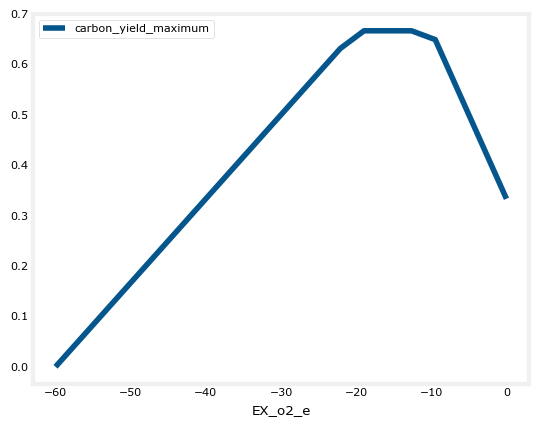

In [5]:
prod_env.plot(kind="line", x="EX_o2_e", y="carbon_yield_maximum")

# 8. Loopless FBA

The goal of this procedure is identification of a *thermodynamically consistent flux state without loops*, as implied by the name. You can find a more detailed description in the method section at the end of the notebook.


Classical loopless approaches as described below are computationally expensive to solve due to the added mixed-integer constraints. A much faster, and pragmatic approach is instead to post-process flux distributions to simply set fluxes to zero wherever they can be zero without changing the fluxes of any exchange reactions in the model. CycleFreeFlux is an algorithm that can be used to achieve this and in cobrapy it is implemented in the cobra.flux_analysis.loopless_solution function. loopless_solution will identify the closest flux distribution (using only loopless elementary flux modes) to the original one. Note that this will not remove loops which you explicitly requested, for instance by forcing a loop reaction to carry non-zero flux.

Using a larger model than the simple example above, this can be demonstrated as follows

In [1]:
%matplotlib inline

import cobra
from cobra.io import load_model
from cobra import Reaction, Metabolite, Model
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba
import pandas

In [2]:
salmonella = load_model("salmonella")
nominal = salmonella.optimize()
loopless = loopless_solution(salmonella)


df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

<Axes: xlabel='loopless', ylabel='nominal'>

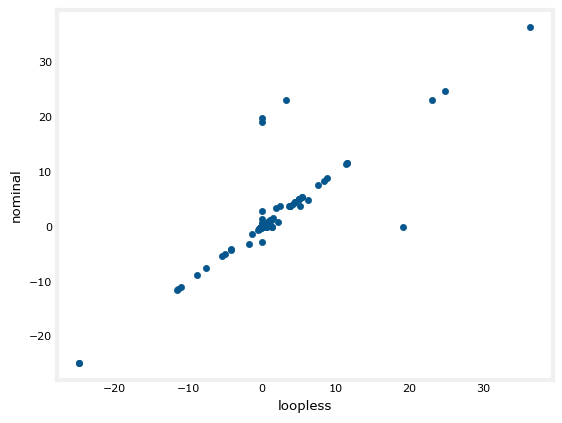

In [11]:
df.plot.scatter(x="loopless", y="nominal")

In [2]:
model = load_model("textbook")
model

Name,e_coli_core
Memory address,16a154700
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [3]:
s_matrix = cobra.util.array.create_stoichiometric_matrix(
    model=model, array_type="DataFrame"
)
s_matrix

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6pgc_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6pgl_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
succ_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
succ_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
succoa_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


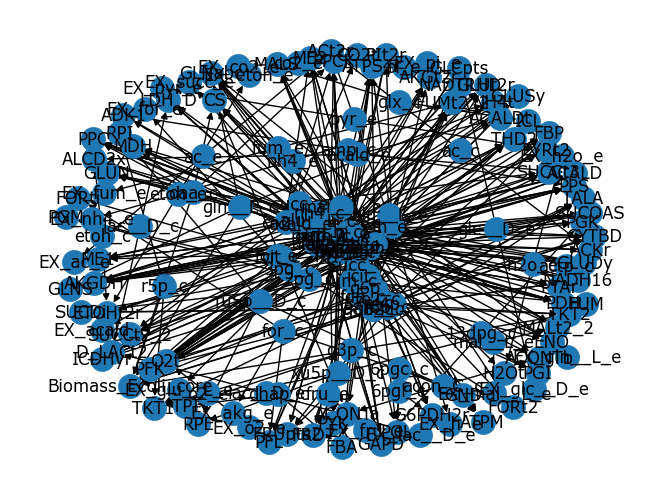

In [22]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        if s_matrix.loc[metabolite, reaction] != 0:
            G.add_edge(metabolite, reaction)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

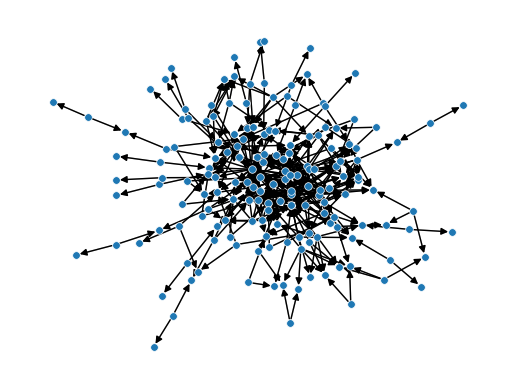

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        if s_matrix.loc[metabolite, reaction] != 0:
            G.add_edge(metabolite, reaction)

# Identify connected and disconnected nodes
connected = [n for n, d in G.degree() if d > 0]
disconnected = list(set(G.nodes()) - set(connected))

# Identify the largest connected component and other connected components
Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# Draw the graph
pos = nx.nx_agraph.graphviz_layout(G)
# Draw the largest connected component
options = {"edge_color": "tab:red"}
nx.draw_networkx_edges(G0, pos, width=6.0, **options)
# Draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
# Draw connected and disconnected nodes
options = {"node_size": 30, "edgecolors": "white"}
nx.draw(G, pos, nodelist=connected, **options)
nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)

plt.show()

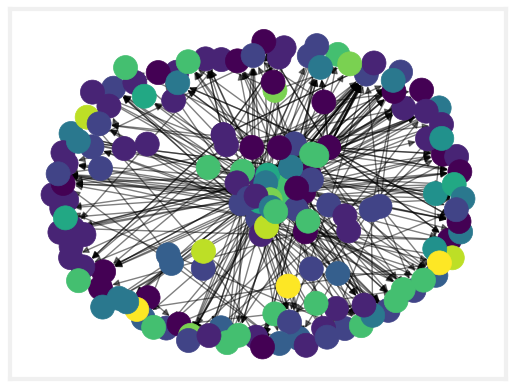

In [35]:
import networkx as nx
import community as community_louvain

# Create an empty directed graph
G = nx.DiGraph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        if s_matrix.loc[metabolite, reaction] != 0:
            G.add_edge(metabolite, reaction)

# Use spring layout
pos = nx.spring_layout(G, seed=42)

# Compute the best partition using Louvain method
partition = community_louvain.best_partition(G.to_undirected())

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=plt.cm.viridis)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

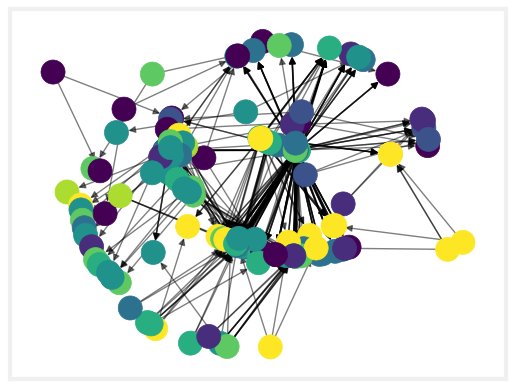

In [39]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        if s_matrix.loc[metabolite, reaction] != 0:
            G.add_edge(metabolite, reaction)

# Use Kamada-Kawai layout with a larger scale
pos = nx.kamada_kawai_layout(G, scale=5)

# Compute the best partition using Louvain method
partition = community_louvain.best_partition(G.to_undirected())

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=plt.cm.viridis)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

/var/folders/27/mvfmcgg96jjbtwzlttj6tbcr0000gn/T/ipykernel_52949/2305714711.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


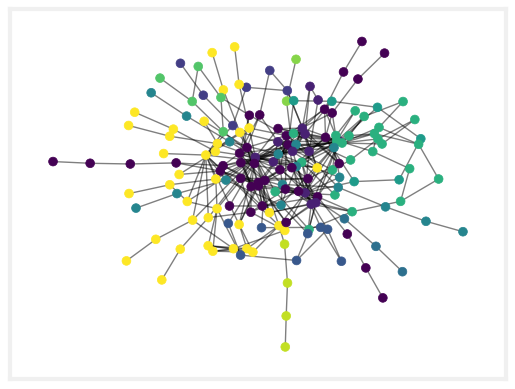

In [40]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import numpy as np

# Create an empty directed graph
G = nx.Graph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        coeff = s_matrix.loc[metabolite, reaction]
        if coeff != 0:
            G.add_edge(metabolite, reaction, weight=abs(coeff))

# Compute the best partition using Louvain method
partition = community_louvain.best_partition(G)

# Create a color map based on the number of communities
cmap = plt.cm.get_cmap("viridis", max(partition.values()) + 1)

# Use Kamada-Kawai layout with a larger scale
pos = nx.kamada_kawai_layout(G, scale=2)

# Draw the nodes, coloring them by their community
nx.draw_networkx_nodes(
    G,
    pos,
    partition.keys(),
    node_size=40,
    cmap=cmap,
    node_color=list(partition.values()),
)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

/var/folders/27/mvfmcgg96jjbtwzlttj6tbcr0000gn/T/ipykernel_52949/693931341.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


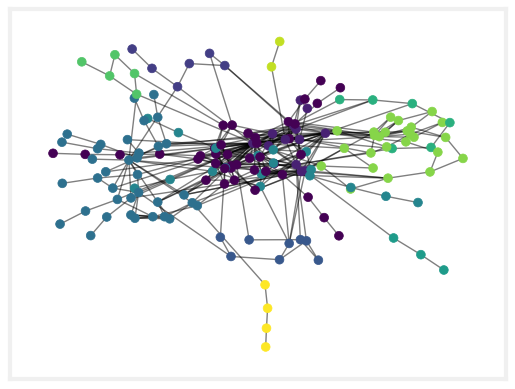

In [46]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import numpy as np

# Create an empty directed graph
G = nx.Graph()

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        coeff = s_matrix.loc[metabolite, reaction]
        if coeff != 0:
            G.add_edge(metabolite, reaction, weight=abs(coeff))

# Compute the best partition using Louvain method
partition = community_louvain.best_partition(G)

# Create a color map based on the number of communities
cmap = plt.cm.get_cmap("viridis", max(partition.values()) + 1)

# Use Kamada-Kawai layout with a larger scale
pos = nx.kamada_kawai_layout(G, scale=2)

# Compute the centroid of each community and move the nodes towards their centroid
pos_communities = {i: [0, 0] for i in set(partition.values())}
count_nodes = {i: 0 for i in set(partition.values())}
for node in G.nodes:
    pos_communities[partition[node]][0] += pos[node][0]
    pos_communities[partition[node]][1] += pos[node][1]
    count_nodes[partition[node]] += 1
for i in pos_communities:
    pos_communities[i][0] /= count_nodes[i]
    pos_communities[i][1] /= count_nodes[i]
for node in G.nodes:
    pos[node][0] += pos_communities[partition[node]][0]
    pos[node][1] += pos_communities[partition[node]][1]

# Draw the nodes, coloring them by their community
nx.draw_networkx_nodes(
    G,
    pos,
    partition.keys(),
    node_size=40,
    cmap=cmap,
    node_color=list(partition.values()),
)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

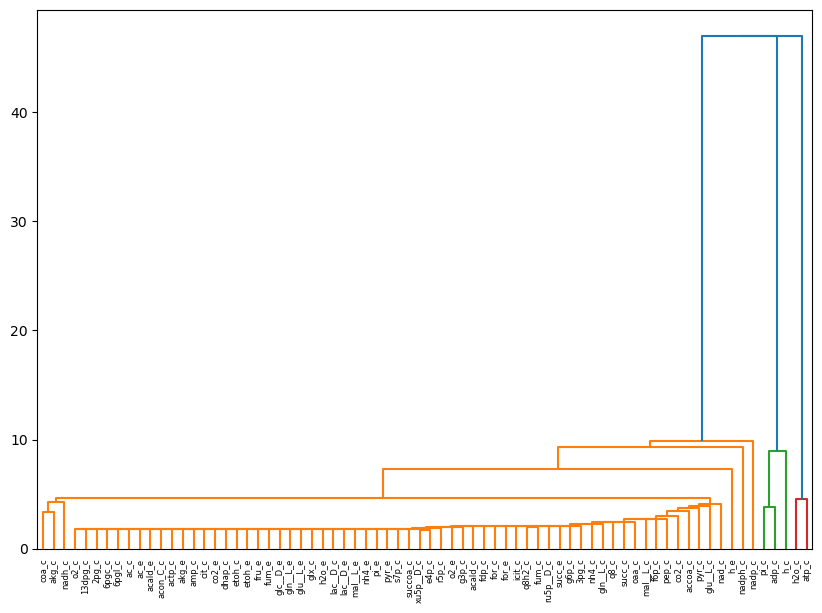

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import seaborn as sns

# Compute the distance matrix
dist_matrix = pdist(s_matrix)

# Apply the hierarchical clustering algorithm
linked = linkage(dist_matrix, "single")

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation="top",
    labels=s_matrix.index.tolist(),  # Use index as labels
    distance_sort="descending",
    show_leaf_counts=True,
)
plt.show()

In [25]:
from scipy.cluster.hierarchy import to_tree

# Convert the linkage matrix to a tree
tree = to_tree(linked)
tree

# Now you can traverse the tree to identify the hierarchy between reactions and compounds

In [30]:
tree.count

72

In [38]:
def dfs(node, path, pathways):
    # Calculate relevance score (number of leaf nodes)
    relevance_score = node.count

    # Add the current pathway and its relevance score to the list of pathways
    pathways.append((path, relevance_score))

    # Recurse on the left and right children
    if node.left is not None:
        dfs(node.left, path + [node.id], pathways)
    if node.right is not None:
        dfs(node.right, path + [node.id], pathways)


# Initialize list of pathways
pathways = []

# Start DFS from the root of the tree
dfs(tree, [], pathways)

# Sort pathways by relevance score in descending order
pathways.sort(key=lambda x: x[1], reverse=True)

# Print the most relevant pathways
for path, score in pathways[:10]:
    print(f"Pathway: {path}, Relevance Score: {score}")

Pathway: [], Relevance Score: 72
Pathway: [142], Relevance Score: 70
Pathway: [142, 141], Relevance Score: 67
Pathway: [142, 141, 140], Relevance Score: 66
Pathway: [142, 141, 140, 139], Relevance Score: 65
Pathway: [142, 141, 140, 139, 137], Relevance Score: 64
Pathway: [142, 141, 140, 139, 137, 136], Relevance Score: 61
Pathway: [142, 141, 140, 139, 137, 136, 133], Relevance Score: 60
Pathway: [142, 141, 140, 139, 137, 136, 133, 132], Relevance Score: 59
Pathway: [142, 141, 140, 139, 137, 136, 133, 132, 130], Relevance Score: 58


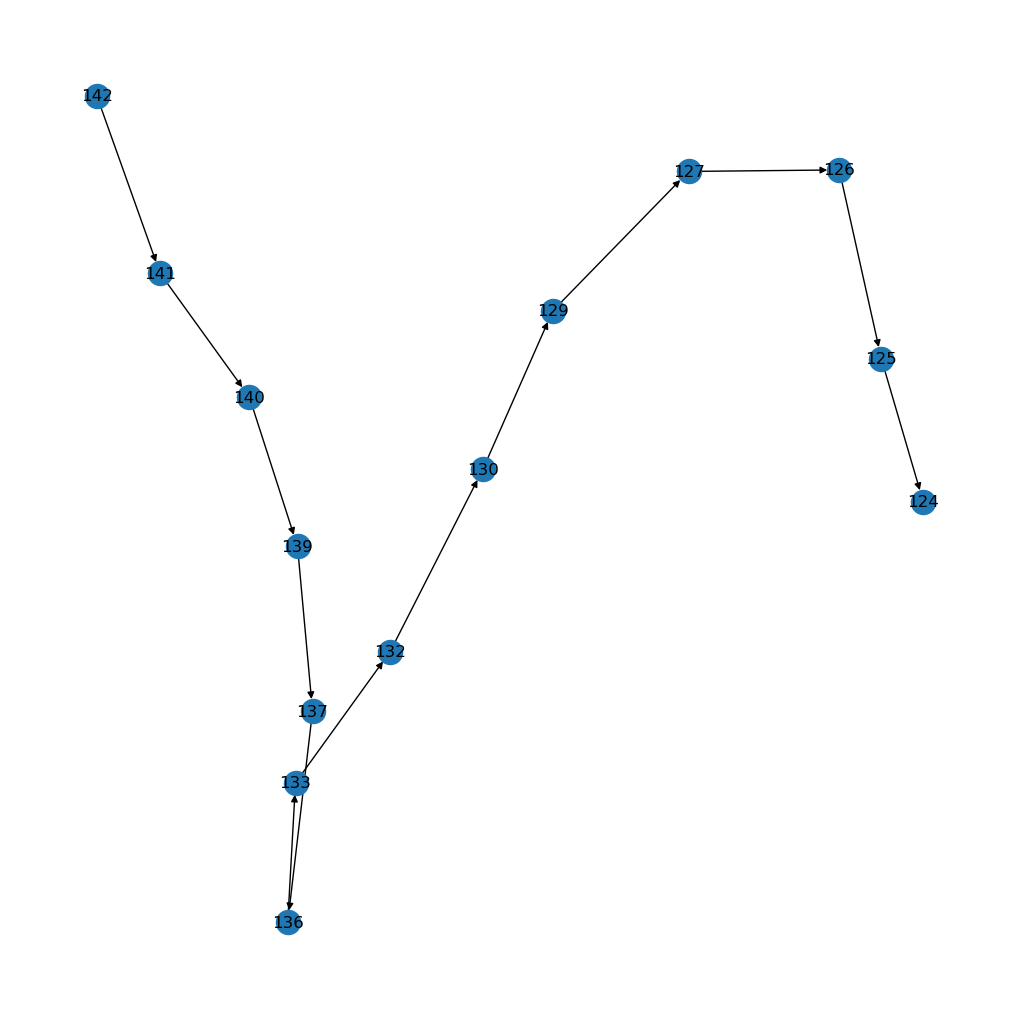

In [41]:
# Get the 10th pathway
my_target = pathways[14][0]  # Indexing starts from 0, so the 10th pathway is at index 9

# Create a new directed graph
G_pathway = nx.DiGraph()

# Add nodes and edges to the graph
for i in range(len(my_target) - 1):
    G_pathway.add_edge(my_target[i], my_target[i + 1])

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G_pathway, with_labels=True, arrows=True)
plt.show()

# Pyvis 

Parece muito bom , mas preciso entender melhor como funciona

In [7]:
from pyvis.network import Network
import community as community_louvain
import pandas as pd
import networkx as nx

# Create an empty network
net = Network(notebook=True, cdn_resources="remote")

# Iterate over the stoichiometric matrix
for reaction in s_matrix.columns:
    for metabolite in s_matrix.index:
        # If the stoichiometric coefficient is not zero, add an edge
        coeff = s_matrix.loc[metabolite, reaction]
        if coeff != 0:
            net.add_node(metabolite, title=metabolite)
            net.add_node(reaction, title=reaction)
            net.add_edge(metabolite, reaction, value=abs(coeff))

# Create a NetworkX graph from the PyVis network
G = nx.Graph(net.get_adj_list())

# Compute the best partition using Louvain method
partition = community_louvain.best_partition(G)

# Set node color based on community
for node in net.nodes:
    node["color"] = partition[node["id"]]

# Show the network
net.show("network.html")
net.show_buttons(filter_=["physics"])

network.html


# 9. Gapfilling 

In [4]:
from cobra.io import load_model
import cobra
from cobra.flux_analysis import gapfill

model = load_model("iYS1720")

In [3]:
model

Name,iYS1720
Memory address,16ab03df0
Number of metabolites,2436
Number of reactions,3357
Number of genes,1707
Number of groups,0
Objective expression,1.0*BIOMASS_iRR1083_1 - 1.0*BIOMASS_iRR1083_1_reverse_12350
Compartments,"cytosol, extracellular space, periplasm"


In this model D-Fructose-6-phosphate is an essential metabolite. We will remove all the reactions using it, and at them to a separate model.

In [7]:
# get all reactions associated with the metabolite !
model.metabolites.f6p_c.reactions

frozenset({<Reaction F6PA at 0x16bf53130>,
           <Reaction F6PP at 0x16bf53280>,
           <Reaction F6Pt6_2pp at 0x16bf32ca0>,
           <Reaction FBP at 0x16ec27430>,
           <Reaction FRUpts2pp at 0x16c23a6a0>,
           <Reaction G6PDA at 0x16ec5f6a0>,
           <Reaction GF6PTA at 0x16ec974f0>,
           <Reaction HEX7 at 0x16ed78580>,
           <Reaction M1PD at 0x16aaadf70>,
           <Reaction MAN6PI at 0x16a803550>,
           <Reaction PFK at 0x16acabc10>,
           <Reaction PGI at 0x16b740460>,
           <Reaction SBTPD at 0x16ac7b100>,
           <Reaction TALA at 0x16b36a880>,
           <Reaction TKT2 at 0x16aaf5190>})

Here we collect the reactions we will remove and add to a empty universal model.

In [8]:
universal = cobra.Model("universal_reactions")
for i in [i.id for i in model.metabolites.f6p_c.reactions]:
    reaction = model.reactions.get_by_id(i)
    universal.add_reactions([reaction.copy()])
    model.remove_reactions([reaction])

universal

Name,universal_reactions
Memory address,16a75f0a0
Number of metabolites,28
Number of reactions,15
Number of genes,26
Number of groups,0
Objective expression,0
Compartments,"c, p"


We can see that the model can no longer grow, without the reactions that use D-Fructose-6-phosphate. We can now use gapfilling to find reactions that can replace the removed ones.

In [10]:
model.optimize().objective_value

0.0

We will use can use the model’s original objective, growth, to figure out which of the removed reactions are required for the model be feasible again. This is very similar to making the ‘no-growth but growth (NGG)’ predictions of Kumar et al. 2009.

In [13]:
solution = gapfill(model=model, universal=universal, demand_reactions=False)
for reaction in solution[0]:
    print(reaction.id)

TALA
GF6PTA


We can obtain multiple possible reaction sets by having the algorithm go through multiple iterations.

In [15]:
result = gapfill(model, universal, demand_reactions=False, iterations=5)
for i, entries in enumerate(result):
    print("---- Run %d ----" % (i + 1))
    for e in entries:
        print(e.id)

---- Run 1 ----
TALA
GF6PTA
---- Run 2 ----
TALA
GF6PTA
---- Run 3 ----
PGI
GF6PTA
TKT2
---- Run 4 ----
TALA
GF6PTA
---- Run 5 ----
GF6PTA
HEX7
TKT2


<mark>We can also instead of using the original objective, specify a given metabolite that we want the model to be able to produce.</mark>

In [17]:
with model:
    model.objective = model.add_boundary(model.metabolites.f6p_c, type="demand")
    solution = gapfill(model, universal)
    for reaction in solution[0]:
        print(reaction.id)

F6PA


# 10. Growth media

The availability of nutrients has a major impact on metabolic fluxes and cobrapy provides some helpers to manage the exchanges between the external environment and your metabolic model. In experimental settings the “environment” is usually constituted by the growth medium, ergo the concentrations of all metabolites and co-factors available to the modeled organism. However, constraint-based metabolic models only consider fluxes. Thus, you can not simply use concentrations since fluxes have the unit`mmol / [gDW h]` (concentration per gram dry weight of cells and hour).



### Impact of Nutrient Availability on Metabolic Fluxes

Nutrient availability is a key factor influencing metabolic fluxes in organisms. Metabolic fluxes refer to the rates at which metabolites are produced and consumed in metabolic pathways. The availability of nutrients determines the substrates that are accessible to the organism, thus impacting these rates. For instance, the presence or absence of glucose in the environment can drastically alter the metabolic pathways active in a cell and their respective fluxes.

### Managing Nutrient Exchanges in COBRApy

COBRApy is a Python package for constraint-based reconstruction and analysis of metabolic models. It helps in managing the exchanges between the external environment (e.g., growth medium) and the metabolic model of an organism. Here are some of the ways COBRApy assists with this:

1. **Defining the Environment**: In experimental settings, the "environment" for a modeled organism is typically defined by the composition of the growth medium, which includes concentrations of various metabolites and cofactors.

2. **Exchange Reactions**: In COBRApy, exchange reactions are used to model the uptake and secretion of metabolites between the organism and its environment. These reactions describe how metabolites enter and leave the metabolic network, which are essential for simulating growth in different conditions.

3. **Setting Flux Bounds**: COBRApy allows setting bounds on these exchange reactions, thereby controlling the rate at which nutrients can be taken up or secreted by the organism. This mimics the availability of nutrients in the growth medium.

### Concentrations vs. Fluxes

- **Concentrations**: In experimental settings, nutrients are often described in terms of their concentrations (e.g., mM, µM) in the growth medium. Concentrations indicate how much of a given nutrient is present in a specific volume of the medium.

- **Fluxes**: In constraint-based metabolic models, such as those used in COBRApy, the focus is on fluxes. Fluxes are typically measured in units of mmol / [gDW h] (millimoles per gram dry weight of cells per hour). This unit indicates the rate at which a metabolite is consumed or produced per unit of cell biomass per hour.

### Conversion Challenges

Because concentrations are not directly used in these models, you need to convert the availability of nutrients (given in concentrations) into appropriate flux bounds. This requires additional information, such as:

- **Cell Density**: The concentration of cells in the medium, often measured in grams of dry weight per liter.
- **Uptake Rates**: Known rates at which cells take up specific nutrients, which can be derived from experimental data or literature.

### Practical Example

Imagine you have a growth medium with a glucose concentration of 5 mM. To convert this into a flux that can be used in a COBRApy model, you would:

1. **Determine Cell Density**: For example, 1 gDW (gram dry weight) of cells per liter of medium.
2. **Estimate Uptake Rate**: Based on experimental data, suppose cells uptake glucose at a rate of 10 mmol per gDW per hour.
3. **Set Flux Bound**: In your COBRApy model, you would set the upper bound for the glucose exchange reaction to 10 mmol/gDW/h, representing the maximum rate at which glucose can be taken up.

In summary, COBRApy provides tools to manage the exchanges between the environment and the metabolic model by setting flux bounds on exchange reactions. This approach allows you to simulate the effect of nutrient availability on metabolic fluxes without directly using concentrations, aligning with the constraints and units used in these models.

So how does that look in COBRApy? The current growth medium of a model is managed by the medium attribute.

In [18]:
from cobra.io import load_model

model = load_model("textbook")
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

This will return a dictionary that contains the upper flux bounds for all active exchange fluxes (the ones having non-zero flux bounds). Right now we see that we have enabled aerobic growth. You can modify a growth medium of a model by assigning a dictionary to model.medium that maps exchange reactions to their respective upper import bounds. *For now let us enforce anaerobic growth by shutting off the oxygen import.*

In [19]:
medium = model.medium
medium["EX_o2_e"] = 0.0
model.medium = medium
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_pi_e': 1000.0}

As we can see oxygen import is now removed from the list of active exchanges and we can verify that this also leads to a lower growth rate.

In [20]:
model.slim_optimize()

0.21166294973531258

In the context of constraint-based metabolic modeling, particularly when using tools like COBRApy, sink and exchange reactions are both types of reactions used to handle the inflow and outflow of metabolites. However, they serve different purposes and have distinct characteristics:

### Exchange Reactions

**Purpose**: Exchange reactions are used to model the uptake and secretion of metabolites between the metabolic network of the organism and the external environment.

**Characteristics**:
- **Bidirectional**: They can represent both the import and export of metabolites.
- **Boundary Conditions**: Exchange reactions define the boundary conditions for the metabolic model, setting the possible inflow and outflow rates of metabolites.
- **Flux Bounds**: By setting flux bounds on exchange reactions, you control the rates at which metabolites can enter or leave the system. For example, setting an upper bound on the glucose exchange reaction defines the maximum rate of glucose uptake.
- **Typical Use**: Exchange reactions are commonly used to simulate nutrient availability in the growth medium and to allow the model to secrete metabolic byproducts.

**Example**:
```plaintext
EX_glc__D_e: Glucose (external) <=> Glucose (internal)
```

### Sink Reactions

**Purpose**: Sink reactions are used to remove metabolites from the metabolic network without specifying a particular destination. They represent a way to consume or produce metabolites within the system without explicitly modeling the external environment.

**Characteristics**:
- **Unidirectional**: Typically, sink reactions represent the consumption of a metabolite (i.e., they only allow for the removal of a metabolite from the system).
- **Internal Focus**: Sink reactions are used to manage internal metabolite pools and can be used to model situations where metabolites are irreversibly consumed or produced.
- **No Environmental Interaction**: Unlike exchange reactions, sink reactions do not directly interact with the external environment. Instead, they represent internal pathways or drains within the metabolic network.

**Example**:
```plaintext
SINK_atp_c: ATP (cytosolic) -> 
```

### Practical Differences

- **Context of Use**:
  - **Exchange reactions** are used when you want to model interactions between the cell and its environment, such as nutrient uptake and waste secretion.
  - **Sink reactions** are used when you need to represent the irreversible consumption or accumulation of metabolites within the metabolic network itself.

- **Modeling Scenario**:
  - When simulating growth in a specific medium, you would use exchange reactions to define which nutrients are available and at what rates they can be taken up.
  - When dealing with metabolites that are produced but not further metabolized or secreted, you might use sink reactions to represent their removal from the system, ensuring they do not accumulate artificially in the model.

### Summary

- **Exchange Reactions**: Model the import/export of metabolites between the organism and the external environment. They are bidirectional and set boundary conditions for nutrient availability and waste secretion.
- **Sink Reactions**: Model the irreversible consumption or production of metabolites within the organism. They are unidirectional and focus on internal pathways without direct environmental interaction.

# 11. Solvers

CarveMe is using another solver called `SCIPSolver`. This is a mixed-integer linear programming solver that is not included in the default COBRApy installation. 
- Link for the lib: https://reframed.readthedocs.io/en/latest/simulation.html

A constraint-based reconstruction and analysis model for biological systems is actually just an application of a class of discrete optimization problems typically solved with linear, mixed integer or quadratic programming techniques. Cobrapy does not implement any algorithm to find solutions to such problems but rather creates a biologically motivated abstraction to these techniques to make it easier to think of how metabolic systems work without paying much attention to how that formulates to an optimization problem.

The actual solving is instead done by tools such as the free software glpk or commercial tools gurobi and cplex which are all made available as a common programmers interface via the optlang package.

### Scipy Solver 


Can be used , however only for slim_optimize

In [29]:
import cobra
from cobra import Model, Reaction, Metabolite

# Load your model
model = load_model("textbook")

# Set the solver to SCIP
model.solver = "scipy"

# Now you can perform FBA or other analyses
solution = model.slim_optimize()
solution

0.8739215069684304

The `model.solver`is a class of `Model`from [optlang](https://github.com/biosustain/optlang). We can use any suppoted solvers.